

### CapStone Project : Customer Segmentation
## Overview
In this Project, we will Explore the factors that influence customer purchasing frequency and the importance of Targeted marketing Campaigns

## Outcomes Addressed
  

*   Target Campaigns
*   Increase profit.
*   Understanding Customer personas and loyalty
*   Developing better marketing strategy







   

In [11]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
# importing essential packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from datetime import date
import warnings
warnings.filterwarnings('ignore')
from matplotlib import colors
from matplotlib.colors import ListedColormap

In [104]:
# Read the dataset (CSV file)
data = pd.read_csv('/content/drive/MyDrive/customer_segmentation.csv')

# **Data cleaning & EDA**

In [14]:
# Display the first few rows of the dataset to check if it's loaded correctly
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [15]:
#check the number of columns and rows in the dataset
data.shape

(2240, 29)

In [16]:
# Check data types
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [17]:
# Check for missing values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**We found missing data in the Income column we have to handle it before we proceeed , so We will replace it with its median.**

In [18]:
#replace missing data with its median.
data['Income'].fillna(data['Income'].median(), inplace = True)

In [19]:
# Check for again if the missing values are replaced
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [20]:
# Check for duplicated values
data.duplicated().sum()

0

In [21]:
# Check shape of data
data.shape

(2240, 29)

**There is no duplicated values**

In [22]:
# Check for unique values
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

**We dicovered 2 columns with one value which means these columns have not related to the data and don't have meaning so w'll drop them**

In [23]:
# Drop the columns 'Z_CostContact' and 'Z_Revenue' from the DataFrame 'data'
data.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

In [24]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [25]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

## **Descriptive Analysis**

In [26]:
#Descriptive Analysis Summary statistics for numerical columns
data[['Year_Birth','Income', 'Kidhome',
       'Teenhome','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
# Analyze categorical variables
categorical_vars = ['Education', 'Marital_Status']
for var in categorical_vars:
    print("\n{}:".format(var))
    print(data[var].value_counts())


Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


## Univariant Analysis (Check the Distribution of each column)

**Before we check the distribution of Year_Birth column we need to calculate the age of customer and change the column name to Age**

In [28]:
# Calculate current year
current_year = pd.Timestamp.now().year

# Calculate age and rename column
data['Age'] = current_year - data['Year_Birth']
data.drop(columns=['Year_Birth'], inplace=True)  # Drop the original 'Year_Birth' column
# Display the DataFrame with the calculated age and renamed column

In [29]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,4,7,0,0,0,0,0,0,1,67
1,2174,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,2,5,0,0,0,0,0,0,0,70
2,4141,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,10,4,0,0,0,0,0,0,0,59
3,6182,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,4,6,0,0,0,0,0,0,0,40
4,5324,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,6,5,0,0,0,0,0,0,0,43


In [30]:
# Custom list of colors
# platte object for sns library
custom_palette = ["#f5a527", "#005c71", "#4fa0ad","#1c4054"]
# cmap object for plt library
# Define a color map (cmap) variable
cmap = sns.color_palette(["#f5a527", "#005c71", "#4fa0ad","#1c4054"])

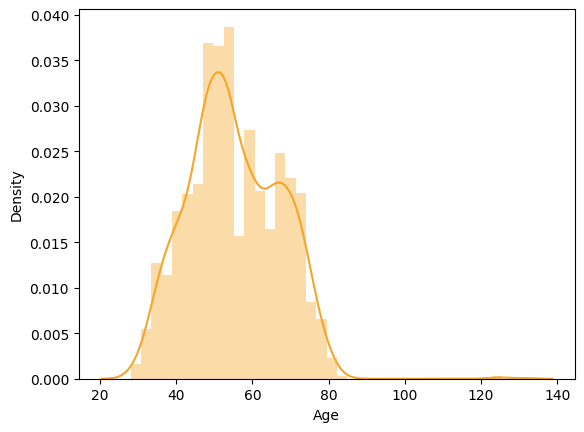

<Figure size 600x400 with 0 Axes>

In [31]:
# checking the distribution of Age
sns.distplot(data['Age'], color=custom_palette[0])
plt.figure(figsize=(6,4))
plt.show()

We note that data points in Age are uniformly  distributed and most of customer are in the middle age between 35 and 65

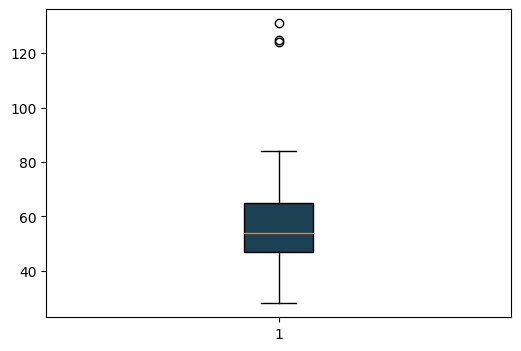

In [32]:

# Checking the outliers of Age
plt.figure(figsize=(6, 4))
plt.boxplot(data['Age'], patch_artist=True, boxprops=dict(facecolor='#1c4054'))
plt.show()


##### There is outlier in the Age column

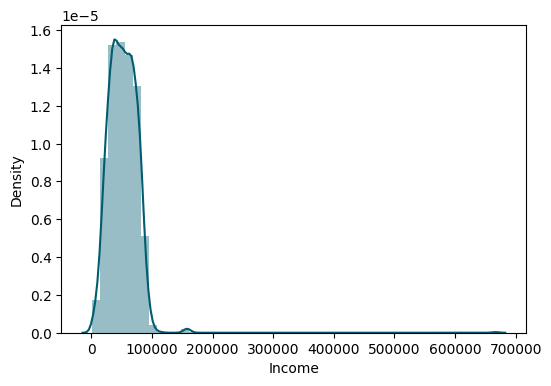

In [33]:
# checking the distribution of Income

plt.figure(figsize=(6,4))
sns.distplot(data['Income'], color=custom_palette[1])
plt.show()

We note that the Income is left skewed

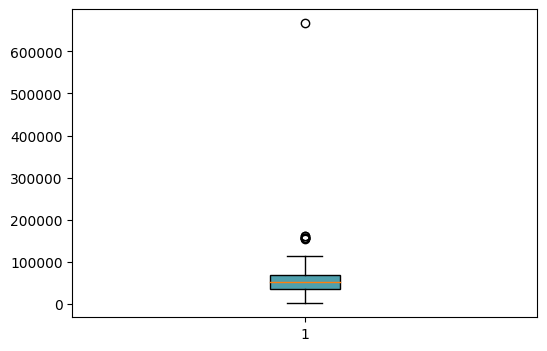

In [34]:
# checking the outliers of Income
plt.figure(figsize=(6,4))
plt.boxplot(data['Income'], patch_artist=True, boxprops=dict(facecolor='#4fa0ad'))
plt.show()

There is outlier in the Income column

In [35]:
# Analize the total number of product each customer has been bought(Total expenses) so we need to combine 'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds' columns to reduce the features
data['Total expenses']=data['MntWines']+data ['MntFruits']+data['MntMeatProducts']+data ['MntFishProducts']+ data['MntSweetProducts']+data['MntGoldProds'	]
data['Total expenses'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: Total expenses, dtype: int64

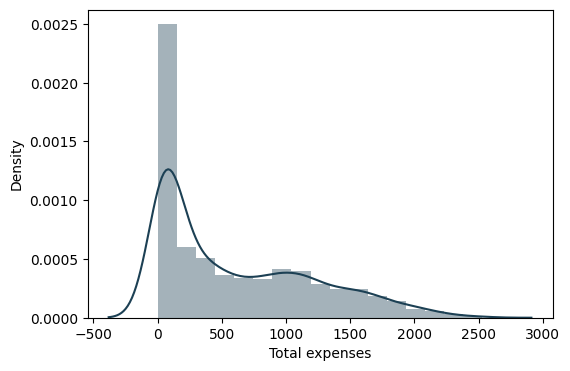

In [36]:
# checking the distribution of Total expenses

plt.figure(figsize=(6,4))

sns.distplot(data['Total expenses'], color=custom_palette[3])
plt.show()

We note that the Total expenses is left skewed

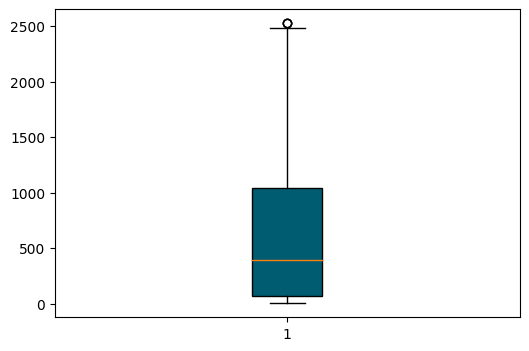

In [37]:
# checking the outliers of Total expenses
plt.figure(figsize=(6,4))

plt.boxplot(data['Total expenses'], patch_artist=True, boxprops=dict(facecolor='#005c71'))
plt.show()

There is no outliears

In [38]:
# Set caps on Age and Income for outlier removal
age_cap = 90
income_cap = 600000

# Remove outliers
data = data[(data['Age'] < age_cap) & (data['Income'] < income_cap)]

# Print the total number of data points after removing outliers
print("The total number of data points after removing the outliers are:", len(data))


The total number of data points after removing the outliers are: 2236


In [39]:
#grouping education levels in two groups to reduce features
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Postgraduate", "Graduation":"Postgraduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [40]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total expenses
0,5524,Postgraduate,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,1,67,1617
1,2174,Postgraduate,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,0,70,27
2,4141,Postgraduate,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,0,59,776
3,6182,Postgraduate,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,0,40,53
4,5324,Postgraduate,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,0,43,422


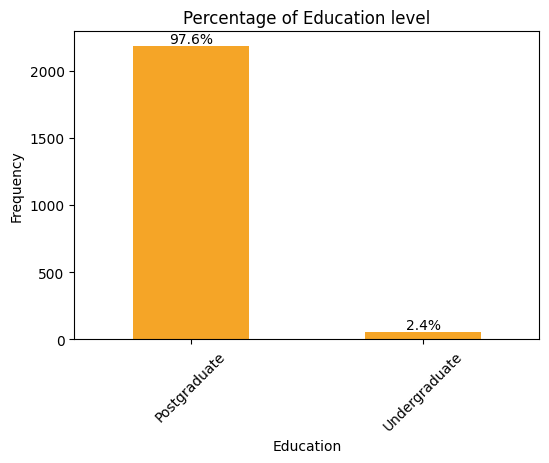

We note that 97.6% of customers are postgraduate level while 2.4 is Undergraduate level 


In [41]:
# Count the frequency of Education level
Education_frequency = data['Education'].value_counts()

# Calculate percentages
Education_percentage = (Education_frequency / Education_frequency.sum()) * 100

# Plot the distribution of Education frequencies
plt.figure(figsize=(6, 4))

ax = Education_frequency.plot(kind='bar',  color='#f5a527')
plt.title('Percentage of Education level')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add percentage labels to the bars
for i, freq in enumerate(Education_frequency):
    ax.text(i, freq, f'{Education_percentage[i]:.1f}%', ha='center', va='bottom')

plt.show()
print('We note that 97.6% of customers are postgraduate level while 2.4 is Undergraduate level ')

In [42]:
#grouping Marital Status in two groups to reduce features

data['Marital_Status']=data['Marital_Status'].replace({'Married':'Relationship','Together':'Relationship', 'Divorced':'Single','Widow':'Single', 'Alone':'Single','Absurd':'Single','YOLO':'Single'})

In [43]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total expenses
0,5524,Postgraduate,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,1,67,1617
1,2174,Postgraduate,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,0,70,27
2,4141,Postgraduate,Relationship,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,0,59,776
3,6182,Postgraduate,Relationship,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,0,40,53
4,5324,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,0,43,422


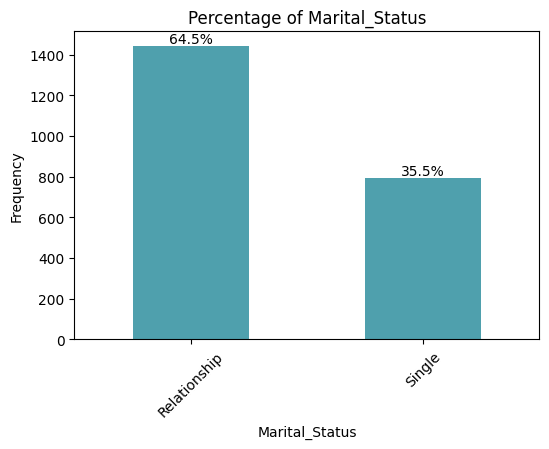

We note that 64.5% of customers are in relationship while 35.5 are single 


In [44]:
# Count the frequency of Marital_Status
Marital_Status_frequency = data['Marital_Status'].value_counts()

# Calculate percentages
Marital_Status_percentage = (Marital_Status_frequency /Marital_Status_frequency.sum()) * 100

# Plot the distribution of Marital_Status frequencies
plt.figure(figsize=(6, 4))

ax = Marital_Status_frequency.plot(kind='bar',  color=custom_palette[2])
plt.title('Percentage of Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add percentage labels to the bars
for i, freq in enumerate(Marital_Status_frequency):
    ax.text(i, freq, f'{Marital_Status_percentage[i]:.1f}%', ha='center', va='bottom')

plt.show()
print('We note that 64.5% of customers are in relationship while 35.5 are single ')

In [45]:
# Analize the total number of kids each customer has so we need to combine Kidhome & Teenhome columns to reduce the features
data['Total Kids No.']=data['Kidhome']+ data['Teenhome']

In [46]:
data.head()

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total expenses,Total Kids No.
0,5524,Postgraduate,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,1,67,1617,0
1,2174,Postgraduate,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,0,70,27,2
2,4141,Postgraduate,Relationship,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,0,59,776,0
3,6182,Postgraduate,Relationship,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,0,40,53,1
4,5324,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,0,43,422,1


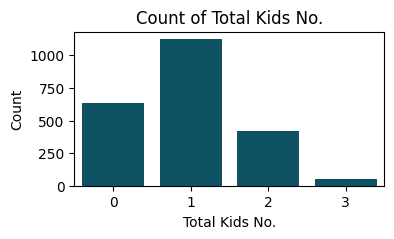

We note that the highest No. of kids each customer has is 1


In [47]:
# Count of Total Kids No.
plt.figure(figsize=(4, 2))
sns.countplot(x='Total Kids No.', data=data,color=custom_palette[1])
plt.title('Count of Total Kids No.')
plt.xlabel('Total Kids No.')
plt.ylabel('Count')
plt.show()

print('We note that the highest No. of kids each customer has is 1')

In [48]:
# Analize the total number of accepted Campaigns by each customer so we need to combine  'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2' columns	to reduce the features
data['Total Accepted Campaigns']=data ['AcceptedCmp3']+ data['AcceptedCmp4']+data ['AcceptedCmp5']+ data['AcceptedCmp1']+data['AcceptedCmp2']

data['Total Accepted Campaigns'].value_counts()

Total Accepted Campaigns
0    1774
1     324
2      83
3      44
4      11
Name: count, dtype: int64

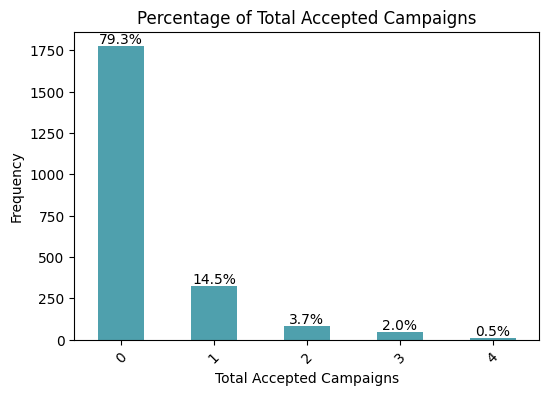

We note that the highest Accepted offer by customer in the Campaign 0  which is 79.3%  


In [49]:
# Count the frequency of Total Accepted Campaigns
Total_Campaigns_frequency = data['Total Accepted Campaigns'].value_counts()

# Calculate percentages
Total_Campaigns_percentage = (Total_Campaigns_frequency /Total_Campaigns_frequency.sum()) * 100

# Plot the distribution of Marital_Status frequencies
plt.figure(figsize=(6, 4))

ax =Total_Campaigns_frequency.plot(kind='bar',color=custom_palette[2])
plt.title('Percentage of Total Accepted Campaigns')
plt.xlabel('Total Accepted Campaigns')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add percentage labels to the bars
for i, freq in enumerate(Total_Campaigns_frequency):
    ax.text(i, freq, f'{Total_Campaigns_percentage[i]:.1f}%', ha='center', va='bottom')

plt.show()
print('We note that the highest Accepted offer by customer in the Campaign 0  which is 79.3%  ')

In [50]:
# Analize the total number of purchases by each customer (Total Purchases) so we need to combine   'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth' columns	to reduce the features
data['Total Purchases No.']=data ['NumDealsPurchases']+ data['NumWebPurchases']+ data['NumCatalogPurchases']+ data['NumStorePurchases']+ data['NumWebVisitsMonth']

data['Total Purchases No.']

0       32
1       11
2       25
3       14
4       24
        ..
2235    23
2236    29
2237    25
2238    26
2239    18
Name: Total Purchases No., Length: 2236, dtype: int64

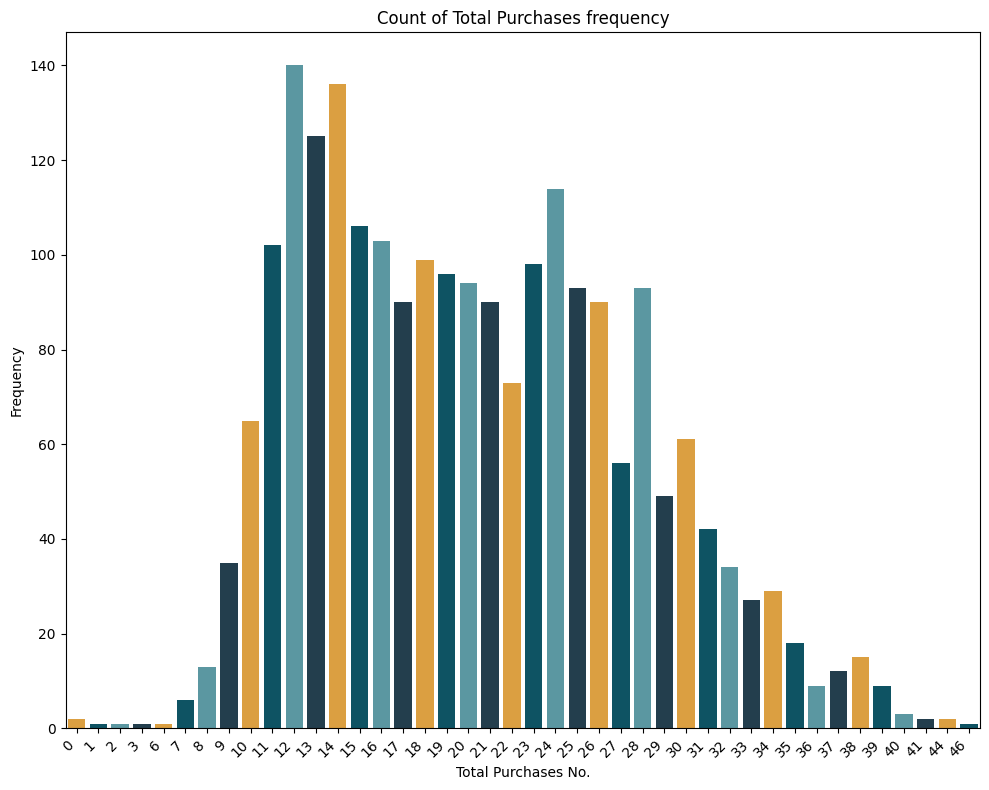

In [51]:
# Count the frequency ofTotal Purchases
Total_Purchases = data['Total Purchases No.'].value_counts()

# Plot the distribution of Total Purchases
plt.figure(figsize=(10, 8))
sns.barplot(x=Total_Purchases.index, y=Total_Purchases.values , palette=custom_palette)
plt.title('Count of Total Purchases frequency')
plt.xlabel('Total Purchases No.')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [52]:
# Dropping unused columns that used to generate others to reduce the features

delet_cololumns = ['Kidhome', 'Teenhome','MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Complain','Response'
       ]
data = data.drop(columns=delet_cololumns,axis=1)

In [53]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'Age', 'Total expenses', 'Total Kids No.', 'Total Accepted Campaigns',
       'Total Purchases No.'],
      dtype='object')

In [54]:
data.isnull().sum()

ID                          0
Education                   0
Marital_Status              0
Income                      0
Dt_Customer                 0
Recency                     0
Age                         0
Total expenses              0
Total Kids No.              0
Total Accepted Campaigns    0
Total Purchases No.         0
dtype: int64

### Now we want to analize the 'Dt_Customer' column which shows the day that specific customer signed up with the business. To See which dates are the oldest and the newest on file.

In [55]:
# Convert 'Dt_Customer' column to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format="%d-%m-%Y")

# Extract date components and convert to list
dates = data['Dt_Customer'].dt.date.tolist()

# Find the newest and oldest enrollment dates
newest_date = max(dates)
oldest_date = min(dates)

# Print the results
print("The newest customer's enrollment date in the records:", newest_date)
print("The oldest customer's enrollment date in the records:", oldest_date)


The newest customer's enrollment date in the records: 2014-06-29
The oldest customer's enrollment date in the records: 2012-07-30


## **Bivariant Analysis (Correlation between two or more columns)**

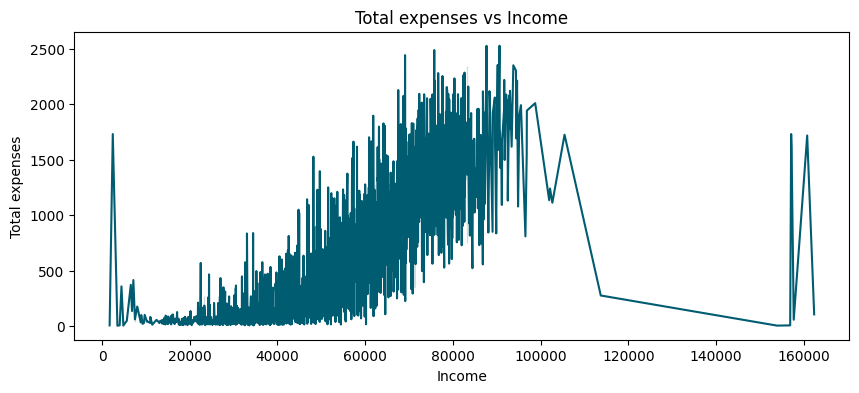


Correlation between Income and Total expenses: 0.7893749146446831


In [56]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=data, x='Income', y='Total expenses', color=custom_palette[1])
plt.title("Total expenses vs Income")
plt.savefig('corr_income and expenses .jpg', format='jpg')
plt.show()
print(f"\nCorrelation between Income and Total expenses: {data['Income'].corr(data['Total expenses'])}")

#### From the chart we that as income increases, total expenses also tend to increase, so the strength of the correlation indicates that changes in income are closely associated with changes in total expenses.

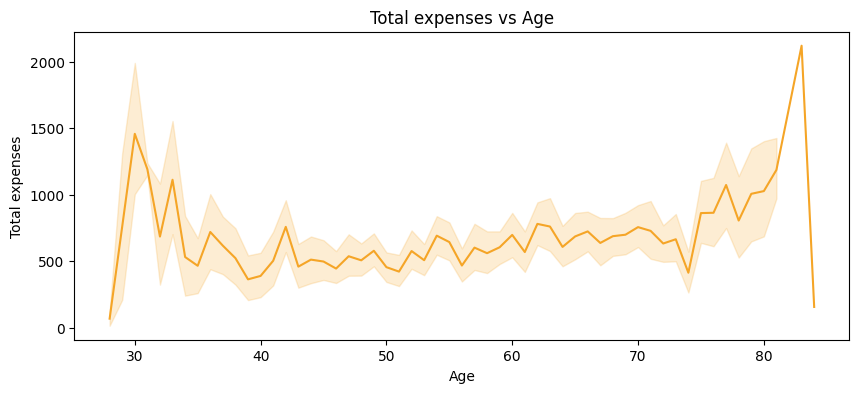

In [57]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=data, x='Age', y='Total expenses', color=custom_palette[0])
plt.title("Total expenses vs Age")
plt.savefig('corr_age and expenses .jpg', format='jpg')
plt.show()
print(f"\nCorrelation between Age and Total expenses: {data['Age'].corr(data['Total expenses'])}")

#### we note that there is a slight tendency for total expenses to increase slightly as age increases, or vice versa. However, the correlation is weak, meaning that age and total expenses are not strongly related.


Correlation between Age and Total expenses: 0.11361767213727979


<Axes: title={'center': 'Education impacts on Total Expenses'}, xlabel='Education', ylabel='Total expenses'>

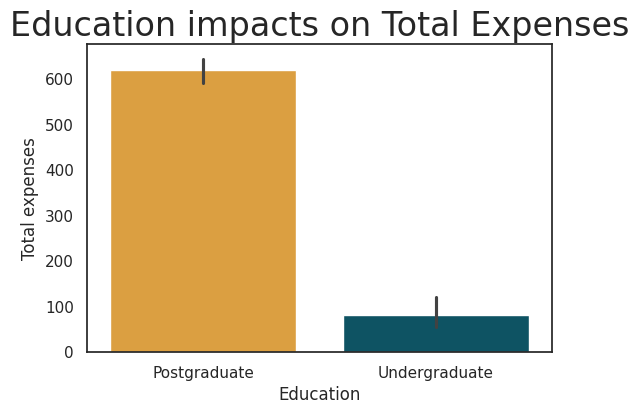

In [58]:

sns.set_theme (style="white")
plt.figure(figsize=(6,4))
plt.title('Education impacts on Total Expenses', fontsize=24)
sns.barplot(x="Education", y="Total expenses", data=data,palette=custom_palette)

**Customers have postgraduate education level have more Total Expenses rate.**

In [59]:
import plotly.express as px

# Define custom colors for each marital status
color_map = {'Single': '#f5a527', 'Relationship': '#4fa0ad'}

# Plot sunburst chart for distribution of marital status based on total expenses and total kids using Plotly Express
fig = px.sunburst(data,
                  path=['Marital_Status', 'Total Kids No.'],
                  values='Total expenses',
                  color='Marital_Status',
                  title='Distribution of Marital Status based on Total Expenses and Total Kids No.',
                  color_discrete_map=color_map)

# Update text information to include label and percentage entry
fig.update_traces(textinfo='label + percent entry')

# Update layout to adjust font size and alignment for the title
fig.update_layout(title={'text': 'Distribution of Marital Status based on Total Expenses and Total Kids No.',
                         'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top',
                         'font': {'size': 24}})

# Show the sunburst chart
fig.show()


### We note that customers in relationship with 0 number of kid have more  Total Expenses rate.


Correlation between Total Accepted Campaigns and Total expenses: 0.45892496164956675


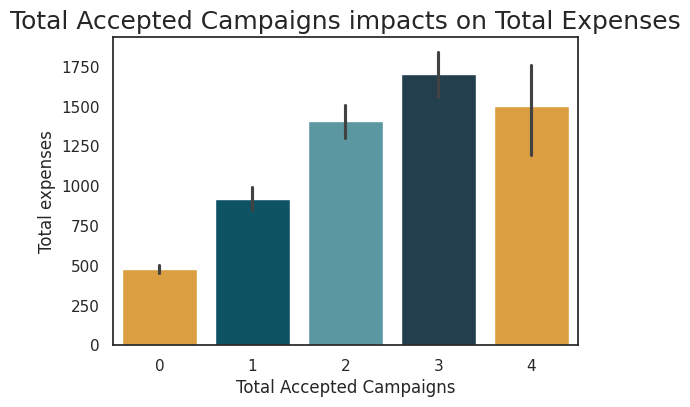

In [60]:
sns.set_theme (style="white")
plt.figure(figsize=(6,4))
plt.title('Total Accepted Campaigns impacts on Total Expenses', fontsize=18)
sns.barplot(x="Total Accepted Campaigns", y="Total expenses", data=data,palette=custom_palette)
plt.savefig('corr_accepted camp and expenses .jpg', format='jpg')
print(f"\nCorrelation between Total Accepted Campaigns and Total expenses: {data['Total Accepted Campaigns'].corr(data['Total expenses'])}")

### so we note that Customers who accepted 3 campaigns have more Total expense rate

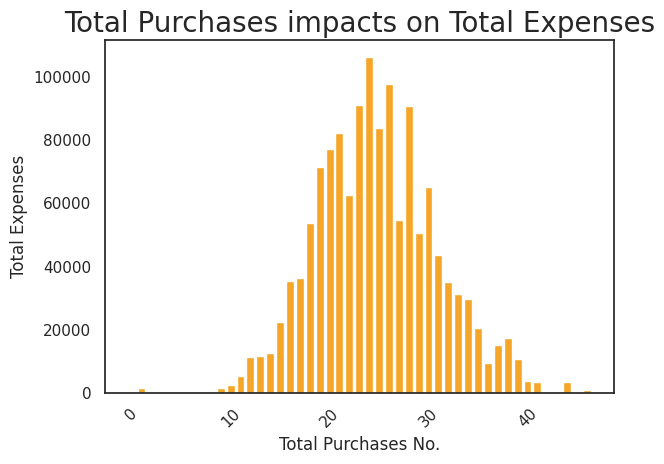


Correlation between Total Purchases No. and Total expenses: 0.6279254476829537


In [61]:
Total_expenses_by_Total_Purchases = data.groupby('Total Purchases No.')['Total expenses'].sum()

# Plotting
plt.bar(Total_expenses_by_Total_Purchases.index, Total_expenses_by_Total_Purchases.values,color=cmap[0])
plt.title('Total Purchases impacts on Total Expenses', fontsize=20)
plt.xlabel('Total Purchases No.')
plt.ylabel('Total Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('corr_purchses and expenses .jpg', format='jpg')
plt.show()
print(f"\nCorrelation between Total Purchases No. and Total expenses: {data['Total Purchases No.'].corr(data['Total expenses'])}")

**Customers with high number of purchases have more Total Expenses**

In [62]:
### Make encoding for categorical data to easier the prediction

from sklearn import preprocessing

# Initialize LabelEncoder
label_encoder = preprocessing.LabelEncoder()

# Encode the 'binary' columns to 0&1
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Marital_Status'] = label_encoder.fit_transform(data['Marital_Status'])

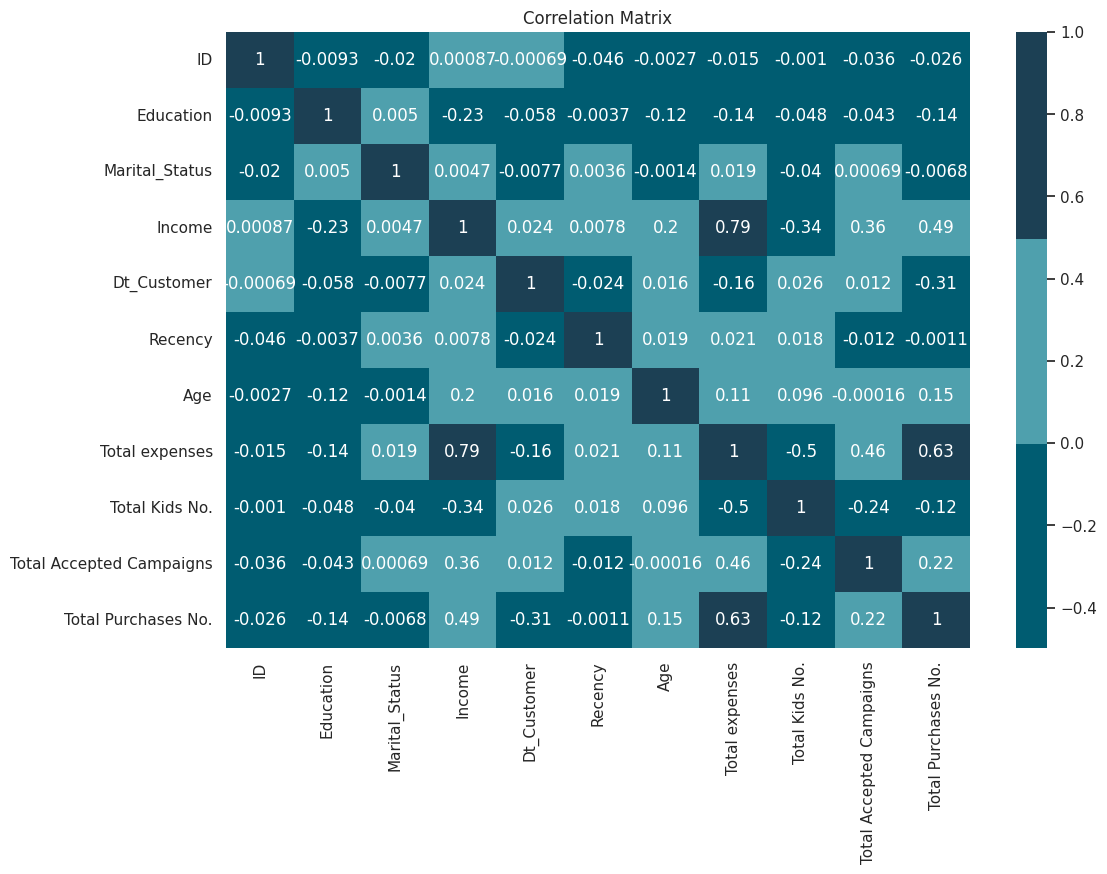

In [63]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap with correlation values annotated
sns.heatmap(corr_matrix, annot=True, cmap=cmap, center=0)

# Add title to the plot
plt.title('Correlation Matrix')

plt.savefig('corr_matrix.jpg', format='jpg')  # Save the plot as a JPG image
# Show the plot
plt.show()


### We note that the most positive correlated feature is Income with Total expenses and Total Purchases.

In [64]:
data.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Age,Total expenses,Total Kids No.,Total Accepted Campaigns,Total Purchases No.
0,5524,0,1,58138.0,2012-09-04,58,67,1617,0,0,32
1,2174,0,1,46344.0,2014-03-08,38,70,27,2,0,11
2,4141,0,0,71613.0,2013-08-21,26,59,776,0,0,25
3,6182,0,0,26646.0,2014-02-10,26,40,53,1,0,14
4,5324,0,0,58293.0,2014-01-19,94,43,422,1,0,24


# **RFM Analysis**

## **Customer Segmentation Based on RFM**

In [65]:
data_copy1= data.copy()

In [66]:
# Group by 'ID' and aggregate RFM metrics
rfm =data_copy1.groupby('ID').agg({
    'Total expenses': lambda x: x.sum(),  # Calculate Monetary: sum of total expenses
    'Recency': lambda x: x.sum(),         # Calculate Recency: sum of recency
    'Total Purchases No.': lambda x: x.sum()  # Calculate Frequency: sum of total purchases
})

# Rename the aggregated columns for clarity
rfm.rename(columns={
    'Total expenses': 'Monetary(Expenses)',
    'Recency': 'Recency',
    'Total Purchases No.': 'Frequency(Purchases No.)'
}, inplace=True)

# Display the RFM metrics
print(rfm)

       Monetary(Expenses)  Recency  Frequency(Purchases No.)
ID                                                          
0                    1198       66                        18
1                     577        0                        23
9                     120       86                        19
13                     32       57                        12
17                   1028       81                        33
...                   ...      ...                       ...
11178                  32       69                        12
11181                   8       85                         0
11187                  69       23                        14
11188                  89       84                        14
11191                 139       11                        14

[2236 rows x 3 columns]


In [67]:
data_copy1.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,Age,Total expenses,Total Kids No.,Total Accepted Campaigns,Total Purchases No.
0,5524,0,1,58138.0,2012-09-04,58,67,1617,0,0,32
1,2174,0,1,46344.0,2014-03-08,38,70,27,2,0,11
2,4141,0,0,71613.0,2013-08-21,26,59,776,0,0,25
3,6182,0,0,26646.0,2014-02-10,26,40,53,1,0,14
4,5324,0,0,58293.0,2014-01-19,94,43,422,1,0,24


In [68]:
#Check if there is customer with 0 expenses to remove them
rfm = rfm[rfm['Monetary(Expenses)']>0]
rfm

,Monetary(Expenses),Recency,Frequency(Purchases No.)
ID,,,
0,1198,66,18
1,577,0,23
9,120,86,19
13,32,57,12
17,1028,81,33
...,...,...,...
11178,32,69,12
11181,8,85,0
11187,69,23,14


In [69]:
rfm.describe()

,Monetary(Expenses),Recency,Frequency(Purchases No.)
count,2236.000000,2236.000000,2236.000000
mean,605.986583,49.116279,20.191413
std,601.865156,28.957284,7.291811
min,5.000000,0.000000,0.000000
25%,69.000000,24.000000,14.000000
50%,396.500000,49.000000,19.000000
75%,1045.500000,74.000000,25.000000
max,2525.000000,99.000000,46.000000


## **Calculate Score for each of RFM**

In [70]:
# Calculate Recency score based on quantiles (5 bins) of Recency values
rfm["recency_score"] = pd.qcut (rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
# Calculate Frequency score based on quantiles (5 bins) of rank of Frequency values
rfm["frequency_score"] = pd.qcut (rfm["Frequency(Purchases No.)"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# Calculate Monetary score based on quantiles (5 bins) of Monetary values
rfm["monetary_score"]= pd.qcut (rfm["Monetary(Expenses)"],5,labels=[1,2,3,4,5])

In [71]:
rfm.sample(10)

,Monetary(Expenses),Recency,Frequency(Purchases No.),recency_score,frequency_score,monetary_score
ID,,,,,,
2130,147,4,14,5,2,2
6568,79,97,13,1,1,2
2565,1334,69,23,2,4,5
3525,17,19,11,5,1,1
6961,11,26,12,4,1,1
7378,573,34,31,4,5,3
3945,930,80,31,1,5,4
10766,506,22,19,4,3,3
4278,1923,73,22,2,3,5


In [72]:
# Create an RFM score by concatenating the recency and frequency scores
rfm["RFM_SCORE"]=(rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))

In [73]:
rfm.head()

,Monetary(Expenses),Recency,Frequency(Purchases No.),recency_score,frequency_score,monetary_score,RFM_SCORE
ID,,,,,,,
0,1198,66,18,2,3,5,23
1,577,0,23,5,4,3,54
9,120,86,19,1,3,2,13
13,32,57,12,3,1,1,31
17,1028,81,33,1,5,4,15


In [74]:

# Define a mapping dictionary to assign segments based on RFM scores
seg_map = {
r'[1-2][1-2]': 'hibernating',
r'[1-2][3-4]': 'at_Risk', r'[1-2]5': 'cant_loose',
r'3[1-2]': 'about_to_sleep',
r'33': 'need_attention',
r'[3-4][4-5]': 'loyal customers',
r'41': 'promising',
r'51': 'new_customers',
r'[4-5][2-3]': 'potential_loyalists',
r'5[4-5]' :' champions'
}
# Assign segments to customers based on RFM score using the mapping dictionary
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
# Display the DataFrame with the added 'segment' column
rfm.head(10)


,Monetary(Expenses),Recency,Frequency(Purchases No.),recency_score,frequency_score,monetary_score,RFM_SCORE,segment
ID,,,,,,,,
0,1198,66,18,2,3,5,23,at_Risk
1,577,0,23,5,4,3,54,champions
9,120,86,19,1,3,2,13,at_Risk
13,32,57,12,3,1,1,31,about_to_sleep
17,1028,81,33,1,5,4,15,cant_loose
20,183,91,12,1,1,2,11,hibernating
22,309,99,22,1,3,3,13,at_Risk
24,47,96,19,1,3,1,13,at_Risk
25,1115,9,25,5,4,4,54,champions


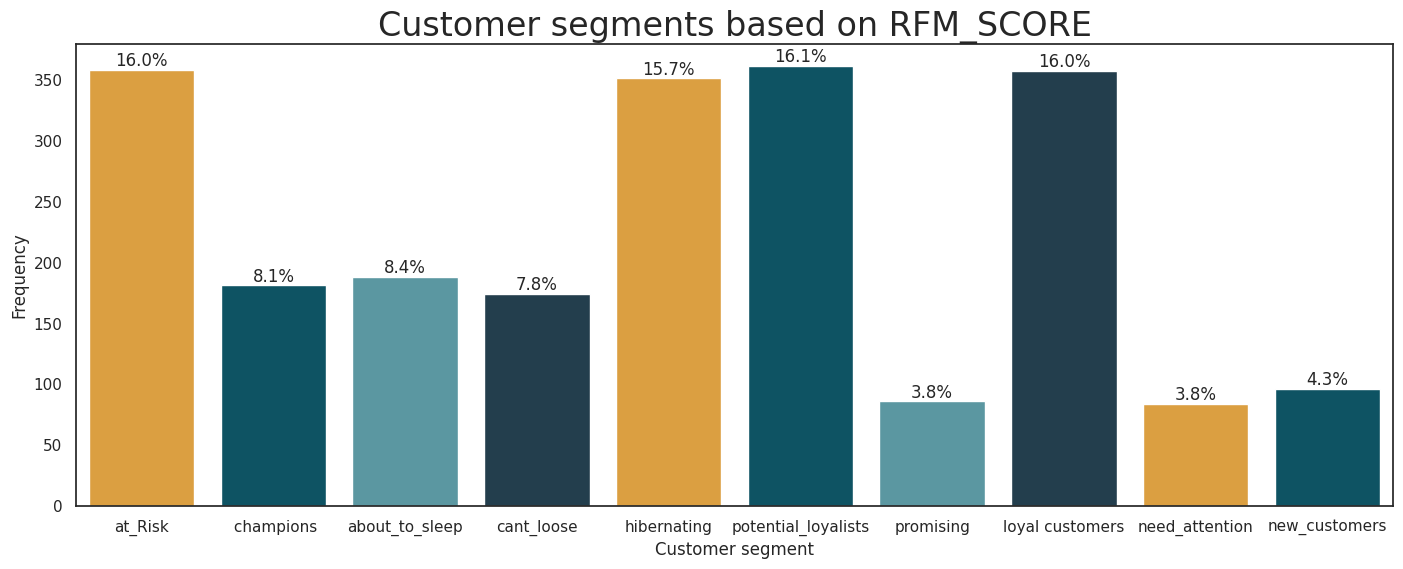

In [75]:
# Plotting the countplot with customized bar color
plt.figure(figsize=(17, 6))
ax = sns.countplot(x='segment', data=rfm, palette=custom_palette)
plt.title('Customer segments based on RFM_SCORE', fontsize=24)
plt.xlabel('Customer segment')
plt.ylabel('Frequency')

# Add percentage labels
total = len(rfm)  # Total number of data points
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()

#### **Based on the chart we conclude that we have to pay big attention for potential_loyalists & loyal customers to convert them to champions by tailed special campaigns and offers.**

# Predictive Analysis

## **K-Means Model**

In [76]:
data_copy2 = data.copy()

In [77]:
# we drop non numerical column  due to apply WCSS + drop unused column
data_copy2.drop(columns=['Dt_Customer'], inplace=True)

In [78]:
data_copy2.head()

,ID,Education,Marital_Status,Income,Recency,Age,Total expenses,Total Kids No.,Total Accepted Campaigns,Total Purchases No.
0,5524,0,1,58138.0,58,67,1617,0,0,32
1,2174,0,1,46344.0,38,70,27,2,0,11
2,4141,0,0,71613.0,26,59,776,0,0,25
3,6182,0,0,26646.0,26,40,53,1,0,14
4,5324,0,0,58293.0,94,43,422,1,0,24


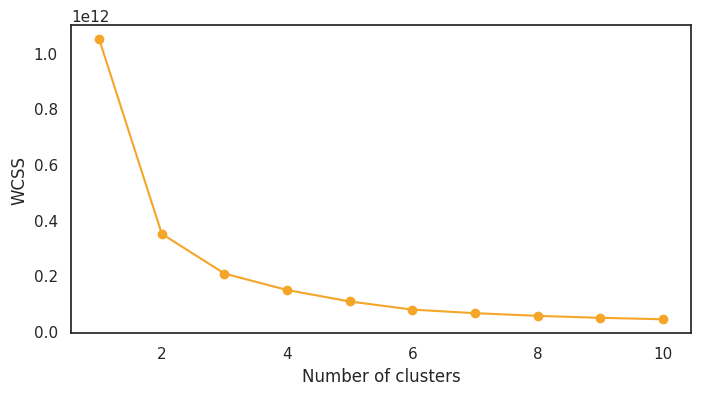

In [79]:
#to check the best K number
from sklearn.cluster import KMeans

#we will use WCSS to determine the best k number
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_copy2)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), WCSS, color=cmap[0], marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### From the chart we conclude that the best number of K is 2

In [80]:

# Training a K-Means Algorithm:
# Initializing and fitting a KMeans model with 2 clusters to the data_copy2 dataset.
kmeans = KMeans(n_clusters=2, random_state=42).fit(data_copy2)

# Predicting cluster labels for data points using the trained KMeans model.
pred = kmeans.predict(data_copy2)

# Appending the predicted cluster labels to the main dataframe (without standard-scaling).
# Adding 1 to the predicted cluster labels to ensure they start from 1 instead of 0.
data_copy2['cluster_Kmeans_Model'] = pred + 1


In [81]:
data_copy2.head()

,ID,Education,Marital_Status,Income,Recency,Age,Total expenses,Total Kids No.,Total Accepted Campaigns,Total Purchases No.,cluster_Kmeans_Model
0,5524,0,1,58138.0,58,67,1617,0,0,32,2
1,2174,0,1,46344.0,38,70,27,2,0,11,1
2,4141,0,0,71613.0,26,59,776,0,0,25,2
3,6182,0,0,26646.0,26,40,53,1,0,14,1
4,5324,0,0,58293.0,94,43,422,1,0,24,2


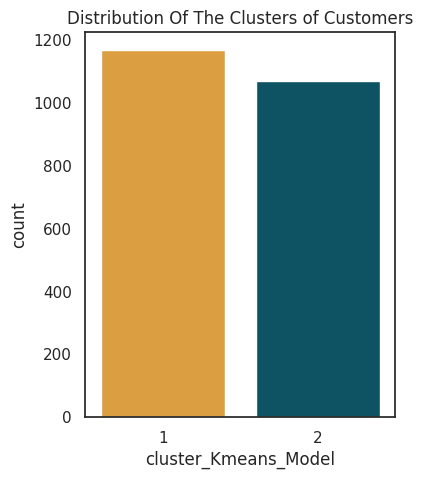

In [82]:
# x-axis represents the 'cluster_of_Customers' column from data_copy2
plt.figure(figsize=(4, 5))
sns.countplot(x=data_copy2["cluster_Kmeans_Model"], palette=custom_palette)

# Set title
plt.title("Distribution Of The Clusters of Customers")

# Show the plot
plt.show()

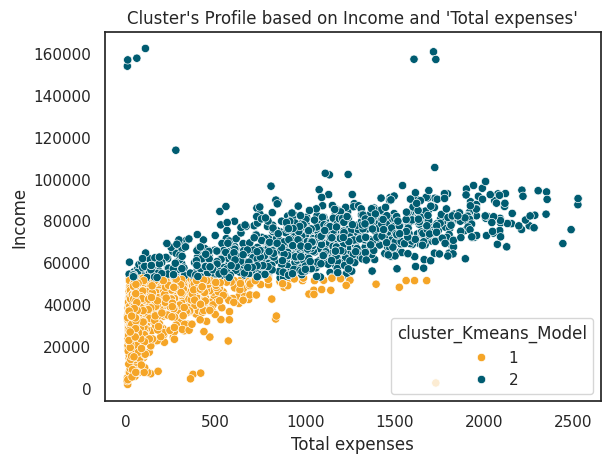

In [83]:
# x-axis represents the 'Total expenses' column from data_copy2
# y-axis represents the 'Income' column from data_copy2
# Points are colored based on the 'cluster' column from data_copy2
sns.scatterplot(x=data_copy2['Total expenses'], y=data_copy2['Income'], hue=data_copy2['cluster_Kmeans_Model'], palette=custom_palette)
plt.title("Cluster's Profile based on Income and 'Total expenses'")
plt.show()


### From the chart we conclude Cluster 2 has high-income rate and expends more than cluster 1.

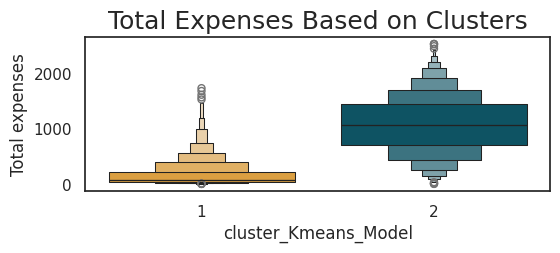

In [84]:


# Plotting the boxenplot
plt.figure(figsize=(6, 2))
sns.boxenplot(data=data_copy2, x='cluster_Kmeans_Model', y='Total expenses', palette=custom_palette)

# Setting the title and adjusting font size
plt.title('Total Expenses Based on Clusters', fontsize=18)

# Show the plot
plt.show()

#### We conclude that Cluster 2 has High Expenses whereas Cluster 1 has low Expenses.

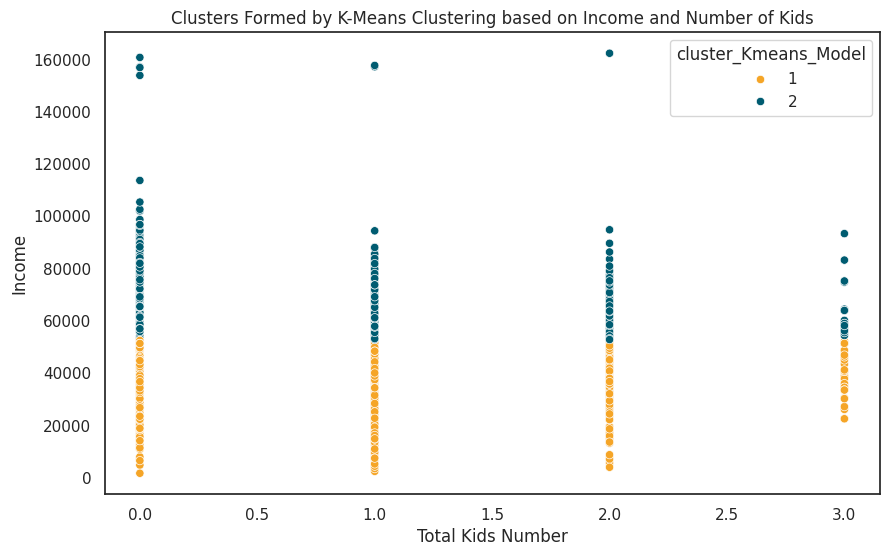

In [85]:
# Plotting a scatter plot to visualize the clusters formed by Kmeans Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_copy2['Total Kids No.'], y=data_copy2['Income'], hue=data_copy2['cluster_Kmeans_Model'], palette=custom_palette)
plt.title("Clusters Formed by K-Means Clustering based on Income and Number of Kids")
plt.xlabel("Total Kids Number")
plt.ylabel("Income")
plt.show()


#### People who have more kids fall into cluster 1 and they expend less than other and the People who having less number of kids falling in cluster 2 which they spnend more.

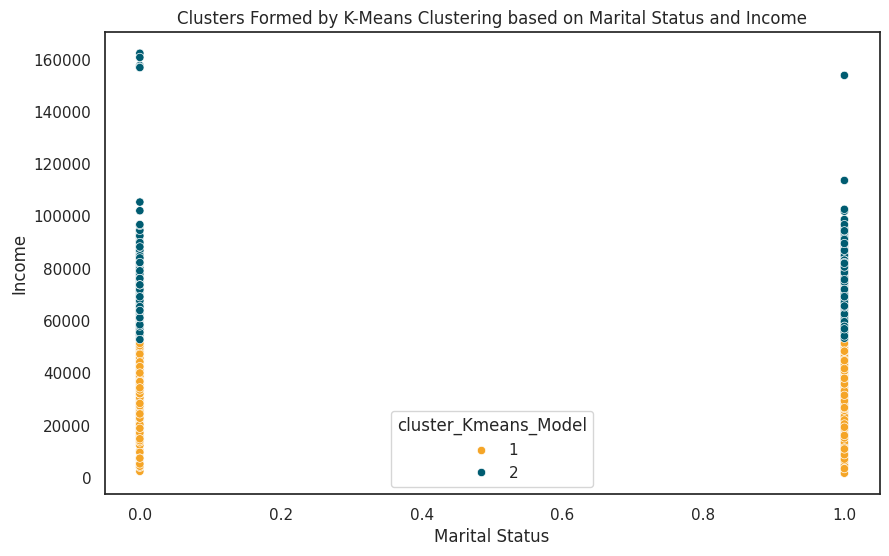

In [86]:
# Plotting a scatter plot to visualize the clusters formed by Kmeans Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_copy2['Marital_Status'], y=data_copy2['Income'], hue=data_copy2['cluster_Kmeans_Model'], palette=custom_palette)
plt.title("Clusters Formed by K-Means Clustering based on Marital Status and Income")
plt.xlabel("Marital Status")
plt.ylabel("Income")
plt.show()


#### Both clusters have almost the same number of different relationship which means no impact on the result.

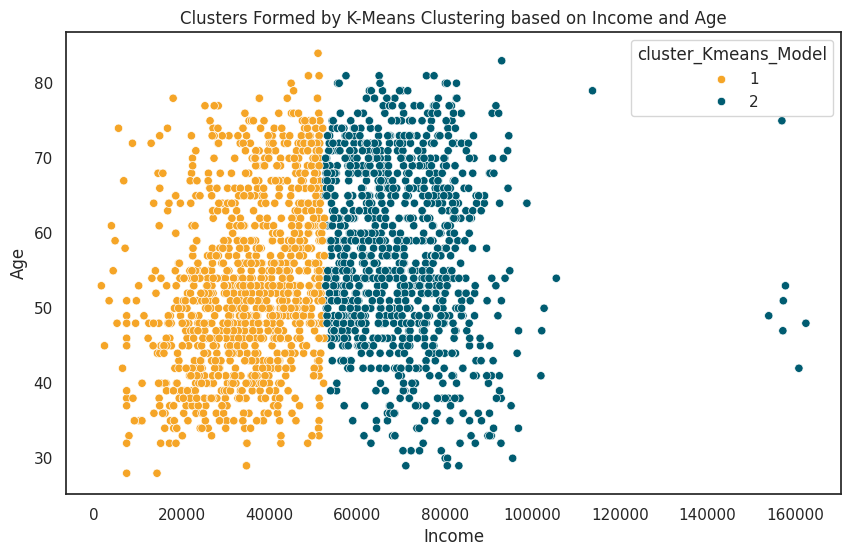

In [87]:
# Plotting a scatter plot to visualize the clusters formed by Kmeans Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_copy2['Income'], y=data_copy2['Age'], hue=data_copy2['cluster_Kmeans_Model'], palette=custom_palette)
plt.title("Clusters Formed by K-Means Clustering based on Income and Age")
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()


#### We conclude that people having less income falling in cluster 1 whrease people with high income falling in cluster 2.

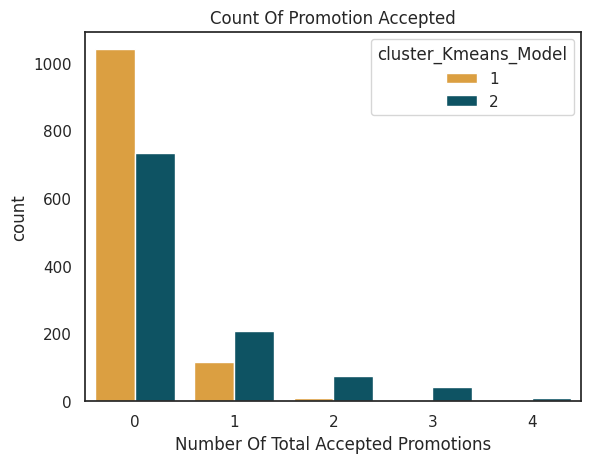

In [88]:
#Plotting count of total campaign accepted.
plt.figure()
sns.countplot(x=data_copy2['Total Accepted Campaigns'],hue=data_copy2['cluster_Kmeans_Model'], palette= custom_palette)
plt.title('Count Of Promotion Accepted')
plt.xlabel('Number Of Total Accepted Promotions')
plt.show()

#### We observe that the campaigns have not yet received a resounding response. Overall, very few people took part. Furthermore, nobody participates in all five of them. Perhaps to increase sales, more carefully thought out and targeted promotions are needed.